In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Main dataset, saved in NumPy zip archive `/srv/data/shared_ov/datasetMC.npz`, contain three parts:
* `data`: $9840$ magnetic configurations in a form of 2D arrays of size $200\times 200$. The quantity in the arrays is the angle between the local magnetic moment ${\bf m}_{ij}$ and the $z$-axis divided by $\pi$; $\theta_{ij} = \arccos(m_z) / \pi$, where $i,j = 1, 2, \dots, 200$. Therefore, $\theta_{ij} \in \left\langle 0, 1\right\rangle$.
* `values`: pairs of corresponding values of Dzyaloshinskii-Moriya interaction ($D$) and externam magnetic field ($B$)
* `properties`: averaged physical properties corresponding to the values of $D$ and $B$, total magnetization ($M$) and topological charge ($Q$)

Note, there are always $5$ different configurations in *data* calculated at the same values of $D$ and $B$.
In *properties* the quantities are already averaged through the $5$ configurations calculated at thes same values of $D$ and $B$. Thus, in *properties* thre are always 5 identical items.

In [2]:
# load data for classification
Dataset = np.load("data/train/datasetMC.npz")    # load dataset
subset = ""

In [3]:
def select_subregion(dataset, B_min=100, B_max=200):
    mask = (dataset["values"][:, 1] >= B_min) & (dataset["values"][:, 1] <= B_max)
    return {key: dataset[key][mask] for key in dataset}


In [4]:
Dataset = select_subregion(Dataset)
subset = "sub"

In [5]:
D = Dataset["data"]           # data: magnetic configurations
V = Dataset["values"]         # values: Dzyaloshiskii-Morya interaction [0] and applied magnetic field [1]
P = Dataset["properties"]     # properties: total magnetization [0] and topological charge [1]

In [6]:
# check shapes
print("Shape of data: {}".format(D.shape))
print("Shape of values: {}".format(V.shape))
print("Shape of properties: {}".format(P.shape))

Shape of data: (4305, 200, 200)
Shape of values: (4305, 2)
Shape of properties: (4305, 2)


In [7]:
# plot total magnetization and topological number

def plot_magnetization_and_topological_number(values, properties):

    # Magnetization
    fig, ax = plt.subplots(figsize=(11,8))

    m = ax.scatter(*values.T, c=(properties.T)[0], cmap="tab10", marker="o", s=60)

    ax.set_title("Magnetization", size=16)
    ax.set_xlabel("D", size=16)
    ax.set_ylabel("B", size=16)

    cbar = fig.colorbar(m, ticks=np.arange(0., 1.01, .1))

    plt.show()

    # Topological number
    fig, ax = plt.subplots(figsize=(11,8))

    m = ax.scatter(*values.T, c=(properties.T)[1], cmap="plasma", marker="o", s=60)

    ax.set_title("Topological number", size=16)
    ax.set_xlabel("D", size=16)
    ax.set_ylabel("B", size=16)


    cbar = fig.colorbar(m)

    plt.show()

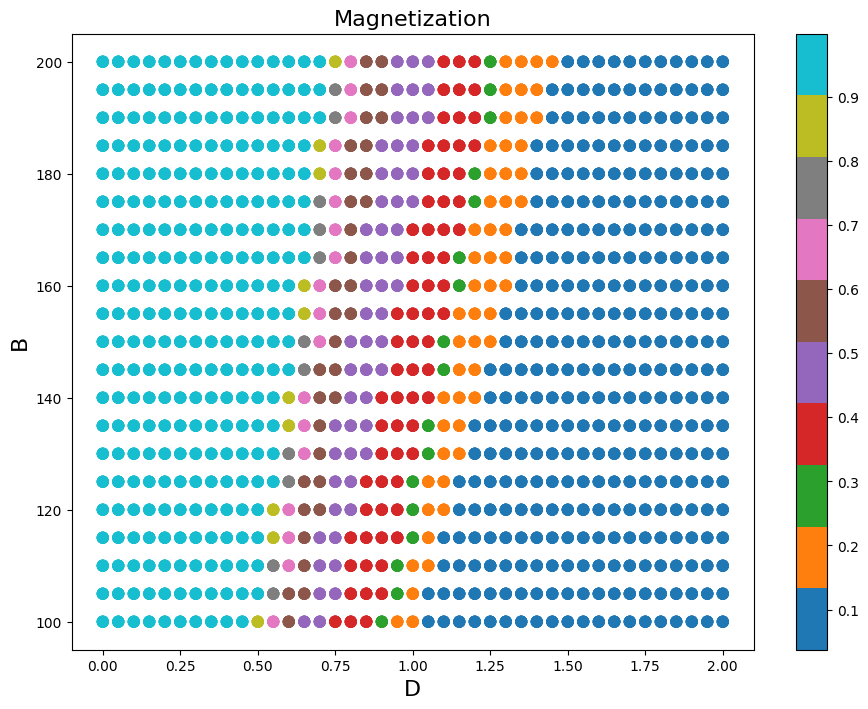

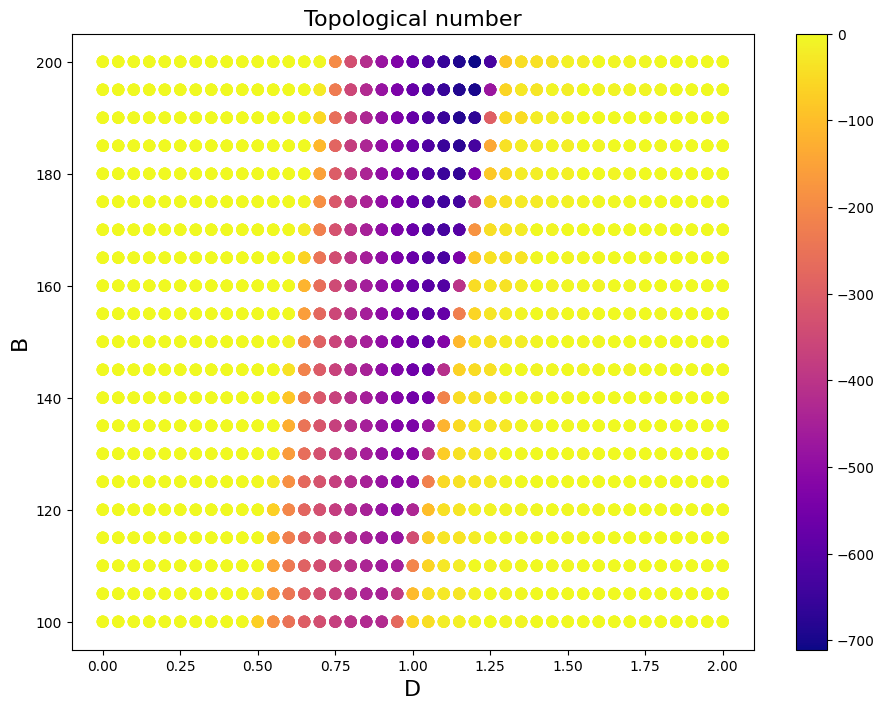

In [8]:
plot_magnetization_and_topological_number(values=Dataset["values"], properties=Dataset["properties"])

In [9]:
def visualize_images(images: np.ndarray, labels=None, row_size: int = 1) -> None:
        """
        Visualize a grid of images with their corresponding labels.

        Args:
            images (np.ndarray): Array of images to visualize.
            row_size (int): Number of images per row in the grid.
        """

        Nsamp = np.arange(len(images))
        n_rows = math.ceil(len(Nsamp) / row_size)

        fig, axs = plt.subplots(
            n_rows, row_size, 
            figsize=(3 * row_size, 3 * n_rows), 
            sharey=True
        )

        # Flatten axs for simpler indexing, in case of a single row
        axs = axs.ravel() if len(Nsamp) > 1 else [axs]

        for n, num_sample in enumerate(Nsamp):
            im = axs[n].imshow(images[num_sample], vmin=0.0, vmax=1.0, cmap="RdBu")

            axs[n].set_xlim((0.0, 200.0))
            axs[n].set_ylim((0.0, 200.0))

            if labels is not None:
                axs[n].text(
                    100, 185, f"{np.round(np.array(labels[num_sample]), 2)}",
                    # 100, 185, f"{np.round(labels[num_sample][0], 2)}_{np.round(labels[num_sample][1], 2)}",
                    color="black", size=12, ha="center", va="top",
                    bbox=dict(facecolor="yellow", edgecolor="black", alpha=0.7),
                )

            axs[n].axis("off")  

        for n in range(len(Nsamp), len(axs)):
            axs[n].axis("off")

        fig.subplots_adjust(wspace=0.03)
        plt.show()

# Phase transitions

In [10]:
# # We want to create two datasets, one for each transition

# # Conditions for filtering fe-sk and sk-sp phase transitions
# # (these conditions are derived heuristically based on the Magnetization and Topological number plots)

# properties = Dataset["properties"]
# magnetization = properties[:, 0]
# topological_number = properties[:, 1]

# condition_fe_sk = (
#     (magnetization < 0.9982) & 
#     (magnetization > 0.75) 
# )

# condition_sk_sp = (
#     (magnetization < 0.35) & 
#     (magnetization > 0.14) &
#     (topological_number < - 80)
# )

# transition_conditions = (
#     condition_fe_sk |
#     condition_sk_sp
# )

In [11]:
properties = Dataset["properties"]
magnetization = properties[:, 0]
topological_number = properties[:, 1]

condition_fe_sk = (
    (magnetization < 0.9986) & 
    (magnetization > 0.70) 
)

condition_sk_sp = (
    ((magnetization < 0.39) & 
    (magnetization > 0.10)) &
    (topological_number < -50)
)

transition_conditions = (
    condition_fe_sk |
    condition_sk_sp
)

fe_condition = (
    magnetization >= 0.9986
    )
sk_condition = (
    (magnetization <= 0.70) &
    (magnetization >= 0.39)
)
sp_condition = (
    (magnetization <= 0.1) |
    (((magnetization < 0.39) & 
    (magnetization > 0.10)) &
    (topological_number >= -50))
)


In [12]:
data_both_transitions = {
    key: Dataset[key][~transition_conditions] for key in Dataset.keys()
}
data_both_transitions["data"].shape

(3710, 200, 200)

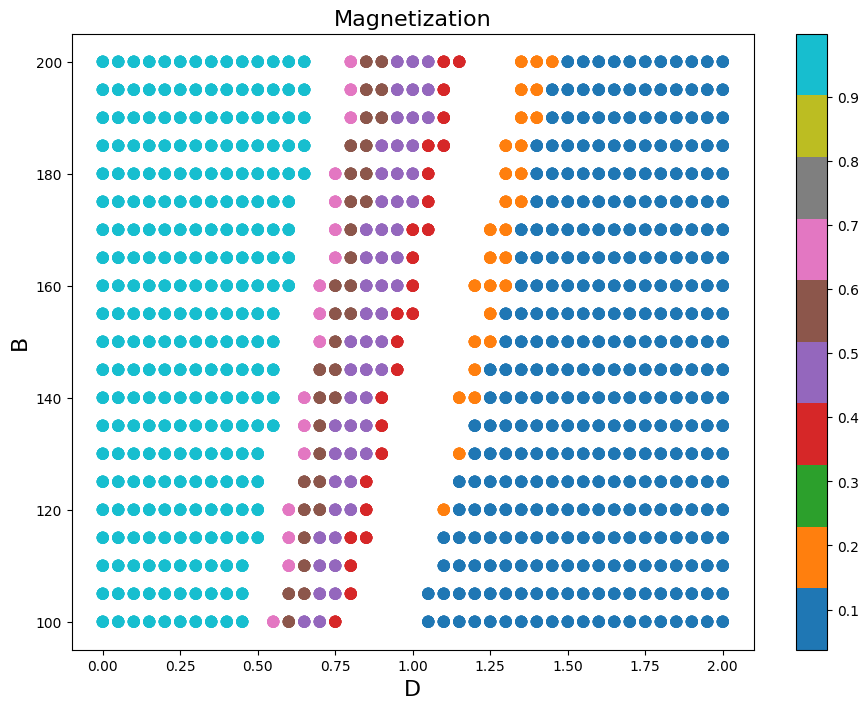

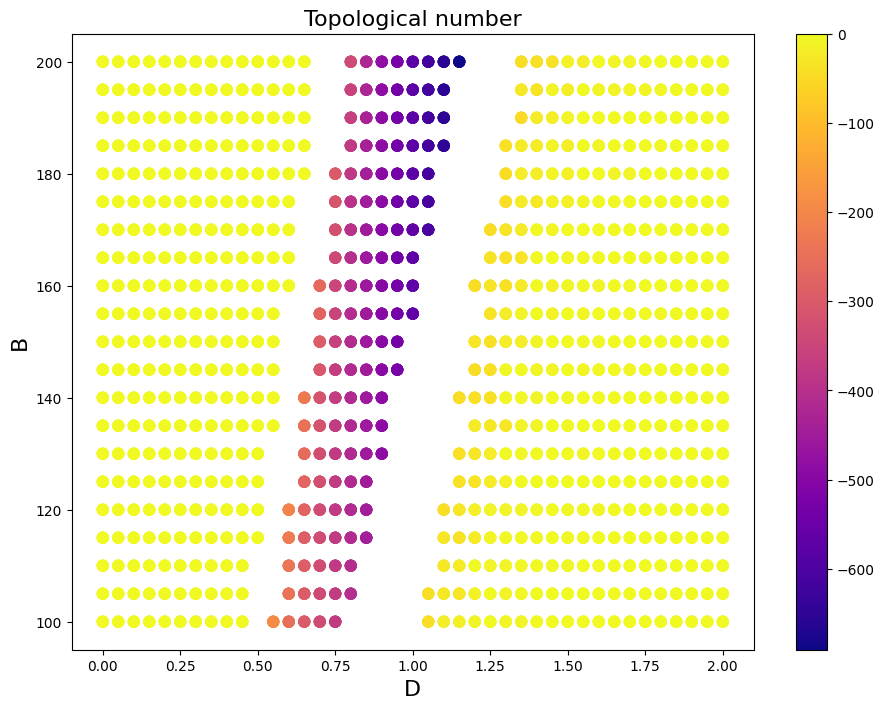

In [13]:
plot_magnetization_and_topological_number(values=data_both_transitions["values"], properties=data_both_transitions["properties"])

# Create transition dataset

In [24]:
import numpy as np

def process_images(images, labels, b_values, rotate=True, threshold=7):
    # filter for sk-sp images, they are hard to distiguish for myself
    filtered_images = [img for img, b in zip(images, labels) if b < threshold]
    filtered_labels = [b for b in labels if b < threshold]
    filtered_b_values = [b_value for b_value, b in zip(b_values, labels) if b < threshold]


    if rotate:
        augmented_images = []
        augmented_labels = []
        augmented_b_values = [[b_value] * 4 for b_value in filtered_b_values]

        for img, lbl in zip(filtered_images, filtered_labels):
            rotated_versions = [np.rot90(img, k=i) for i in range(4)]
            
            # Apply np.roll across both axes with random shifts
            rolled_images = [
                np.roll(rot, shift=(np.random.randint(-30, 30), np.random.randint(-30, 30)), axis=(0, 1))
                for rot in rotated_versions
            ]

            augmented_images.extend(rolled_images)
            augmented_labels.extend([lbl] * 4)
    else:
        augmented_images = filtered_images
        augmented_labels = filtered_labels
        augmented_b_values = filtered_b_values

    return np.array(augmented_images), np.array(augmented_labels), np.array(augmented_b_values).flatten()

def create_transition_dataset(Dataset, condition):

    dataset = {
        key: Dataset[key][condition] for key in Dataset.keys()
    }

    data = dataset["data"]
    values = dataset["values"]
    # properties = dataset["properties"]

    D = np.round(values[:, 0], decimals=2)
    B = np.round(values[:, 1], decimals=2)
    data_trans = {}

    for d_value in np.unique(D):
        indices = np.where(D == d_value)

        b_values, b_labels = np.unique(B[indices], return_inverse=True)

        if len(b_values) <= 5: # if there are 5 or less unique values of B we will not use the data
            continue

        images, labels, b_values = process_images(data[indices], b_labels, B[indices])

        data_trans[str(d_value)] = {"images": images, "labels": labels, "b_values": b_values}

    return data_trans

In [25]:
data_trans_fe_sk = create_transition_dataset(Dataset, condition_fe_sk)
data_trans_sk_sp = create_transition_dataset(Dataset, condition_sk_sp)

In [ ]:
for D, dataset in data_trans_fe_sk.items():
    print(D)
    visualize_images(dataset["images"][::20], labels=dataset["labels"][::20], row_size=8)
    # visualize_images(dataset["images"][::5], row_size=6) # for a presentation
    # break

In [ ]:
for D, dataset in data_trans_sk_sp.items():
    print(D)
    visualize_images(dataset["images"][::4], labels=dataset["labels"][::4], row_size=5)

In [26]:
if subset:
    np.savez("data/test/fe_sk_transition_sub.npz", data_trans_fe_sk)
    np.savez("data/test/sk_sp_transition_sub.npz", data_trans_sk_sp)

# Create train and test data

In [14]:
B = V[:, 1]
D = V[:, 0]

In [15]:
train_fe = (
    (B >= 150) & 
    (B <= 170) & 
    (D >= 0.1) & 
    (D <= 0.4)
)

train_sk = (
    (B <= 195) &
    (B >= 155) &
    np.isclose(D, 0.95) 
) | (
    (B <= 160) &
    (B >= 145) &
    np.isclose(D, 0.9)
) | (
    (B <= 120) &
    (B >= 100) &
    np.isclose(D, 0.7)
)


train_sp = (
    (B <= 140) &
    (B >= 120) &
    (D >= 1.65) &
    (D <= 1.85)
) | (
    (B <= 190) &
    (B >= 180) &
    (D >= 1.75) &
    (D <= 1.95)
)

In [16]:
train_indices = (train_fe | train_sk | train_sp)
dev_test_indices = ~(train_indices | transition_conditions)
# visualize_images(Dataset["data"][train_indices][::5], row_size=5)

In [ ]:
visualize_images(Dataset["data"][dev_test_indices][::5], labels=V[dev_test_indices, :][::5],row_size=6)

In [ ]:
# visualizing samples to create new small dataset for evaluation

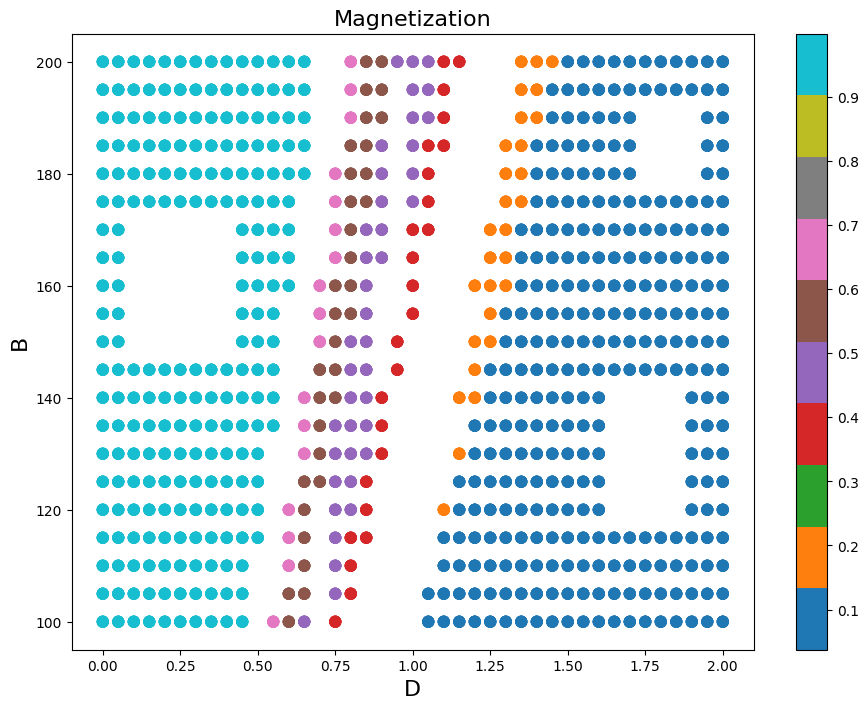

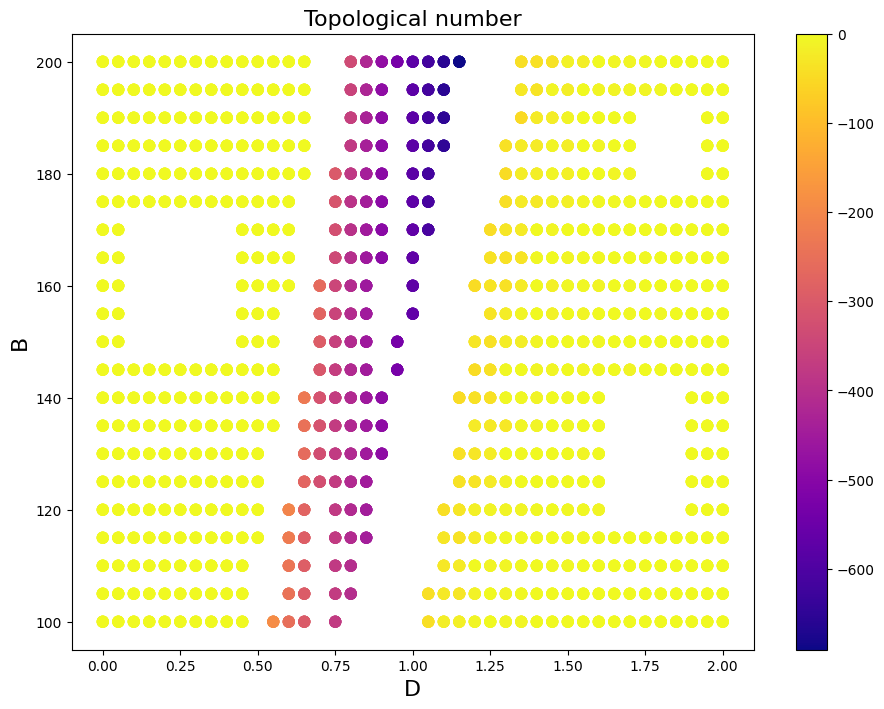

In [18]:
plot_magnetization_and_topological_number(values=Dataset["values"][dev_test_indices, :], properties=Dataset["properties"][dev_test_indices, :])

In [22]:
labels = [0, 1, 2]
conds = [fe_condition, sk_condition, sp_condition]
train_dev_test_conds = [train_indices, dev_test_indices]


dataset_sub = {
    "train": {
        "images": np.concatenate([
            Dataset["data"][train_indices & fe_condition],
            Dataset["data"][train_indices & sk_condition],
            Dataset["data"][train_indices & sp_condition],
        ]),
        "labels": np.concatenate([
            np.zeros(np.sum(train_indices & fe_condition), dtype=int),
            np.ones(np.sum(train_indices & sk_condition), dtype=int),
            2 * np.ones(np.sum(train_indices & sp_condition), dtype=int),
        ]),
    },
    "dev_test": {
        "images": np.concatenate([
            Dataset["data"][dev_test_indices & fe_condition],
            Dataset["data"][dev_test_indices & sk_condition],
            Dataset["data"][dev_test_indices & sp_condition],
        ]),
        "labels": np.concatenate([
            np.zeros(np.sum(dev_test_indices & fe_condition), dtype=int),
            np.ones(np.sum(dev_test_indices & sk_condition), dtype=int),
            2 * np.ones(np.sum(dev_test_indices & sp_condition), dtype=int),
        ]),
    },
}


In [14]:
dataset_sub["dev_test"]["labels"].shape


(3260,)

In [ ]:
# labels = [0, 1, 2]
# conds = [fe_condition, sk_condition, sp_condition]
# train_dev_test_conds = [train_indices, dev_test_indices]

# clean_dataset = {"images": [], "labels": []}


# for train_test_cond in train_dev_test_conds:
#     for label, condition in zip(labels, conds):
#         clean_dataset["images"].extend(Dataset["data"][condition])
#         clean_dataset["labels"].extend([label] * np.sum(condition))

# clean_dataset["images"] = np.array(clean_dataset["images"])
# clean_dataset["labels"] = np.array(clean_dataset["labels"], dtype=np.int32)

In [23]:
def reshape_images(images, reshape_dims=(200, 200, 1)):
    """Creates additional dimension for the 2D image."""
    return np.array([image.reshape(reshape_dims) for image in images])

def separate_dataset(images, labels):
    """Divides the data and the corresponding labels into 3 separate datasets, each one containing just a single phase"""
    phases = ["ferromagnet", "skyrmion", "spiral"]
    separated_dataset = {}

    for label, phase in enumerate(phases): # 0-ferromagnet, 1-skyrmion, 2-spiral
        idxs = labels == label 
        separated_dataset[phase] = (images[idxs], labels[idxs])
    
    return separated_dataset

def shuffle_dataset(images, labels, random_seed=42):
    """Suffles the samples in the dataset"""
    np.random.seed(random_seed)
    indices = np.random.permutation(len(images))
    return images[indices], labels[indices]


def split_dataset(images, labels, train_ratio, dev_ratio, random_seed=42):
    """Splits the data into train, dev, and test sets."""

    images, labels = shuffle_dataset(images, labels, random_seed)
    
    train_stop = int(len(images) * train_ratio)
    dev_stop = len(images) if train_ratio + dev_ratio >= 1 else train_stop + int(len(images) * dev_ratio)

    splitted_dataset = {
        "train": {"images": images[:train_stop], "labels": labels[:train_stop]},
        "dev": {"images": images[train_stop:dev_stop], "labels": labels[train_stop:dev_stop]},
        "test": {"images": images[dev_stop:], "labels": labels[dev_stop:]},
    }
    
    return splitted_dataset

def train_dev_test_split(images, labels, train_ratio=0.8, dev_ratio=0.1):
    """
    Splits data and labels into train, dev, and test sets by aggregating results 
    from all classes in the dataset.
    """
    # Initialize combined dataset structure using dictionary comprehensions
    combined_splits = {split: {"images": [], "labels": []} for split in ["train", "dev", "test"]}
    
    # Iterate over separated data and combine splits
    for subset_images, subset_labels in separate_dataset(images, labels).values():
        splits = split_dataset(subset_images, subset_labels, train_ratio, dev_ratio)
        for split in combined_splits: # train, dev, test
            for key in combined_splits[split]: # images, labels
                combined_splits[split][key].extend(splits[split][key])
    
    return combined_splits


def save_dataset(filename, train, dev, test):
    """Saves the dataset into a `.npz` file."""
    np.savez(
        filename,
        train_images=train["images"], train_labels=train["labels"],
        dev_images=dev["images"], dev_labels=dev["labels"],
        test_images=test["images"], test_labels=test["labels"]
    )

In [33]:
_, dev, test = train_dev_test_split(reshape_images(dataset_sub["dev_test"]["images"]), dataset_sub["dev_test"]["labels"], train_ratio=0, dev_ratio=0.5).values()
train, _, _ = train_dev_test_split(reshape_images(dataset_sub["train"]["images"]), dataset_sub["train"]["labels"], train_ratio=1, dev_ratio=0).values()
save_dataset("data/train/skyrmion_dataset_sub.npz", train, dev, test)

In [ ]:
cond_visualize = (
    np.isclose(B, 180) &
    np.isclose(D, 0.25)
) | (
    np.isclose(B, 110) &
    np.isclose(D, 0.3)
) | (
    np.isclose(B, 200) &
    np.isclose(D, 0.9)
) | (
    np.isclose(B, 160) &
    np.isclose(D, 0.8)
) | (
    np.isclose(B, 110) &
    np.isclose(D, 0.6)
) | (
    np.isclose(B, 200) &
    np.isclose(D, 1.5)
) | (
    np.isclose(B, 170) &
    np.isclose(D, 1.75)
) | (
    np.isclose(B, 140) &
    np.isclose(D, 1.25)
) | (
    np.isclose(B, 100) &
    np.isclose(D, 1.75)
)
